In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv("features_output.csv")

# Display the shape of the dataframe
print("Shape of the training dataset:", df.shape)

# Display the column names of the dataframe
print("\nColumns in the training dataset:\n", list(df.columns))
df.head()

Shape of the training dataset: (1083, 10)

Columns in the training dataset:
 ['file_name', 'num_points', 'frac_flower_points', 'more5_neighbor_flower', 'more5_neighbor_ovr', 'mean_closest_distance', 'std_closest_distance', 'mean_count', 'std_count', 'label']


,file_name,num_points,frac_flower_points,more5_neighbor_flower,more5_neighbor_ovr,mean_closest_distance,std_closest_distance,mean_count,std_count,label
0,Mouse0.xy,157,0.203822,0.783439,0.562500,0.027662,0.010382,4.235669,1.564495,Clean
1,thing.xy,343,0.011662,0.784257,0.250000,0.009741,0.005463,4.276968,1.918673,Clean
2,stair.xy,160,0.087500,0.775000,0.642857,0.013795,0.006745,3.450000,1.283550,Clean
3,vase.xy,317,0.022082,0.687697,0.571429,0.010439,0.004041,3.492114,1.113766,Clean
4,skyhawkocc1.xy,232,0.021552,0.797414,0.000000,0.020222,0.003940,2.905172,0.359080,Clean


In [3]:
label_counts = df['label'].value_counts()
print("\nCounts of each label:\n", label_counts)


Counts of each label:
 label
Distorted    548
Band         385
Clean        150
Name: count, dtype: int64


In [4]:
df.tail()

,file_name,num_points,frac_flower_points,more5_neighbor_flower,more5_neighbor_ovr,mean_closest_distance,std_closest_distance,mean_count,std_count,label
1078,mgen1fp-0.01.xy,153,0.045752,0.771242,0.428571,0.019871,0.010354,3.222222,0.958091,Distorted
1079,mgen1fp.xy,153,0.058824,0.771242,0.000000,0.024106,0.001424,2.725490,0.539127,Clean
1080,mgen1fp-12.5-5.xy,1071,0.072829,0.850607,0.769231,0.006133,0.003852,4.800187,2.028103,Band
1081,mgen1fp-7.5-2.xy,459,0.045752,0.764706,0.523810,0.007747,0.004427,3.479303,1.126579,Band
1082,mgen1fp-10-2.xy,459,0.054466,0.751634,0.480000,0.009542,0.005180,3.880174,1.278624,Band


In [5]:
df.describe()

,num_points,frac_flower_points,more5_neighbor_flower,more5_neighbor_ovr,mean_closest_distance,std_closest_distance,mean_count,std_count
count,1083.000000,1083.000000,1083.000000,1083.000000,1083.000000,1083.000000,1083.000000,1083.000000
mean,1949.226223,0.061158,0.788212,0.487007,0.015982,0.006915,3.963264,1.463329
std,9845.082370,0.040893,0.059153,0.283704,0.016472,0.007786,1.217194,0.903829
min,20.000000,0.000000,0.463196,0.000000,0.000250,0.000170,2.437500,0.200726
25%,164.000000,0.037648,0.759953,0.250000,0.006715,0.003171,3.051452,0.897680
50%,301.000000,0.060403,0.793333,0.533333,0.013923,0.005211,3.644928,1.257518
75%,821.000000,0.079139,0.832061,0.730846,0.020618,0.008858,4.610261,1.894177
max,193354.000000,0.500000,0.898089,1.000000,0.213462,0.097917,11.783784,7.265748


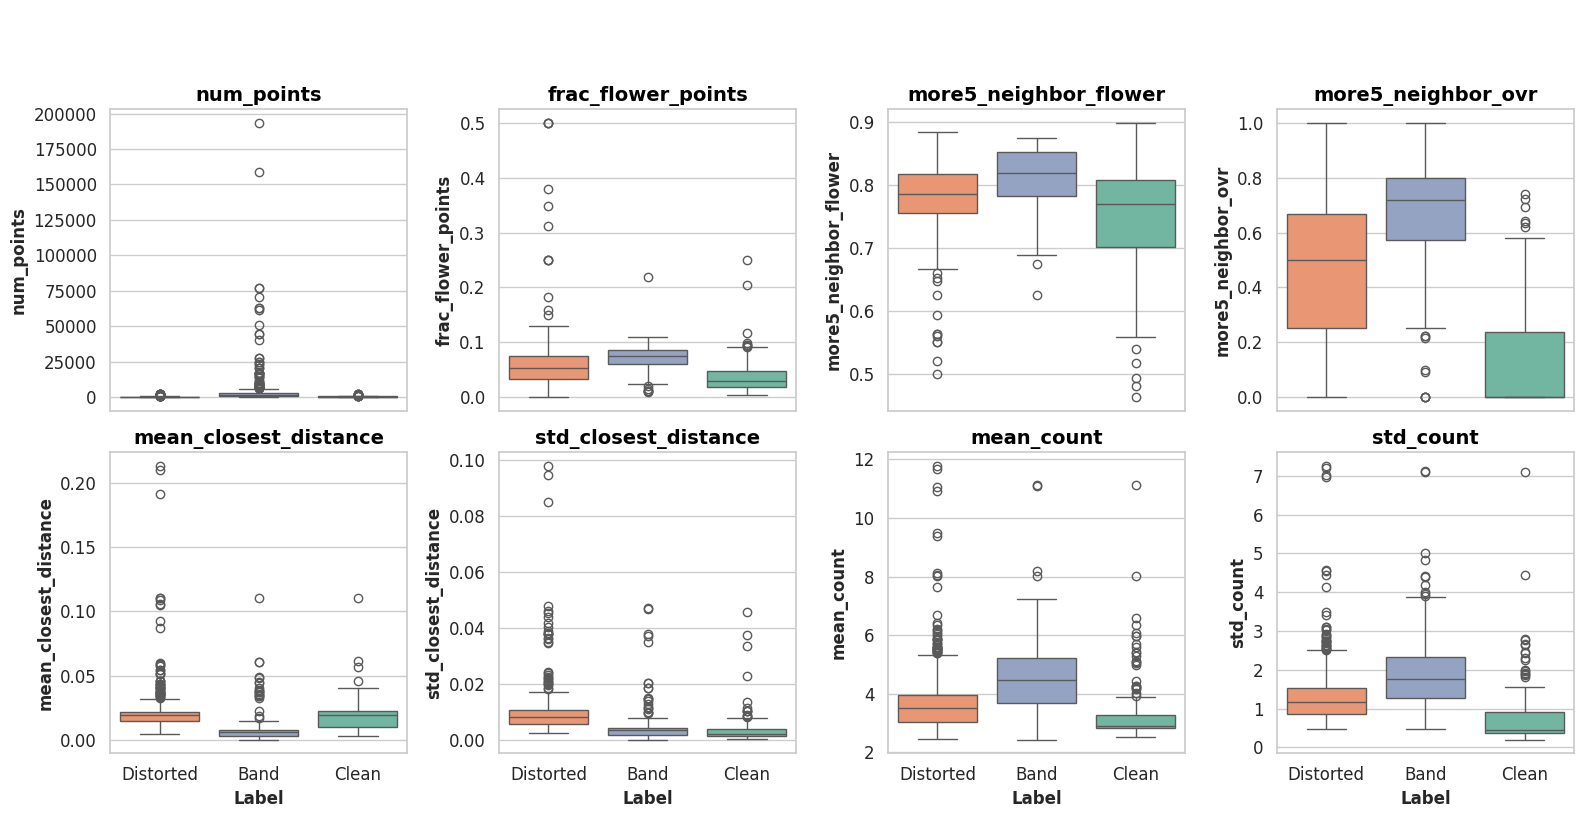

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

features = ['num_points', 'frac_flower_points', 'more5_neighbor_flower', 
            'more5_neighbor_ovr', 'mean_closest_distance', 'std_closest_distance', 
            'mean_count', 'std_count']

sns.set(style="whitegrid")

num_features = len(features)
num_rows = 2
num_cols = 4

fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 8), sharex=True)

for i, feature in enumerate(features):
    row = i // num_cols
    col = i % num_cols
    sns.boxplot(x='label', y=feature, data=df, ax=axes[row, col], 
                order=['Distorted', 'Band', 'Clean'], hue='label', palette='Set2', legend=False)
    
    axes[row, col].set_title(f'{feature}', fontsize=14, fontweight='bold', color='black')
    axes[row, col].set_ylabel(feature, fontsize=12, fontweight='bold')
    axes[row, col].set_xlabel('Label', fontsize=12, fontweight='bold')
    axes[row, col].tick_params(axis='both', labelsize=12)

plt.suptitle(' ', fontsize=18, fontweight='bold', color='black', y=1.02)
plt.tight_layout()
plt.show()

In [43]:
X = df.drop(['label', 'file_name'], axis=1)
y = df['label']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42)
X_train.shape, X_test.shape

((890, 8), (158, 8))

In [45]:
# Sample labels mapping
label_mapping = {
    'Clean': 0,
    'Distorted': 1,
    'Band': 2
}

# Assuming y_train and y_test are your target variables (pandas Series)
y_train = y_train.map(label_mapping)
y_test = y_test.map(label_mapping)

Run upto this to pre-process the data

In [9]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the parameter distribution for XGBoost
xgb_param_dist = {
    'n_estimators': randint(10, 80),
    'max_depth': randint(1, 10),
    'learning_rate': [0.01, 0.02, 0.04, 0.05],
    'subsample': [0.6, 0.7, 0.8]
}

# Create an XGBoost classifier
xgb = XGBClassifier()

# Use random search to find the best hyperparameters
xgb_rand_search = RandomizedSearchCV(xgb, 
                                      param_distributions=xgb_param_dist, 
                                      n_iter=100, 
                                      cv=5)

# Fit the random search object to the data
xgb_rand_search.fit(X_train,  y_train)

best_xgb = xgb_rand_search.best_estimator_
print('Best XGBoost hyperparameters:', xgb_rand_search.best_params_)

Best XGBoost hyperparameters: {'learning_rate': 0.04, 'max_depth': 9, 'n_estimators': 51, 'subsample': 0.7}


In [10]:
from sklearn.tree import DecisionTreeClassifier

dt_param_dist = {
    'max_depth': randint(1, 10),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 10)
}

# Create a Decision Tree classifier
dt = DecisionTreeClassifier()

# Random search for Decision Tree
dt_rand_search = RandomizedSearchCV(dt, 
                                     param_distributions=dt_param_dist, 
                                     n_iter=100, 
                                     cv=5)
dt_rand_search.fit(X_train,  y_train)

best_dt = dt_rand_search.best_estimator_
print('Best Decision Tree hyperparameters:', dt_rand_search.best_params_)

Best Decision Tree hyperparameters: {'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 9}


Run from here for training RF model

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {'n_estimators': randint(10,80),
              'max_depth': randint(1,10)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=100, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train,  y_train)

best_rf = rand_search.best_estimator_
print('Best Random Forest hyperparameters:', rand_search.best_params_)

Best Random Forest hyperparameters: {'max_depth': 8, 'n_estimators': 72}


In [12]:
import pickle

# Assuming your models are named best_rf, best_xgb, and best_dt

# Save the Random Forest model
with open('best_random_forest_model.pkl', 'wb') as file:
    pickle.dump(best_rf, file)
print("Model saved as 'best_random_forest_model.pkl'")

# Save the XGBoost model
with open('best_xgboost_model.pkl', 'wb') as file:
    pickle.dump(best_xgb, file)
print("Model saved as 'best_xgboost_model.pkl'")

# Save the Decision Tree model
with open('best_decision_tree_model.pkl', 'wb') as file:
    pickle.dump(best_dt, file)
print("Model saved as 'best_decision_tree_model.pkl'")

Model saved as 'best_random_forest_model.pkl'
Model saved as 'best_xgboost_model.pkl'
Model saved as 'best_decision_tree_model.pkl'


In [13]:
# For Random Forest
y_pred_rf = best_rf.predict(X_test)
y_pred_train_rf = best_rf.predict(X_train)
print('Random Forest:')
print('Training set score: {:.4f}'.format(best_rf.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(best_rf.score(X_test, y_test)))

# For XGBoost
y_pred_xgb = best_xgb.predict(X_test)
y_pred_train_xgb = best_xgb.predict(X_train)
print('XGBoost:')
print('Training set score: {:.4f}'.format(best_xgb.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(best_xgb.score(X_test, y_test)))

# For Decision Tree
y_pred_dt = best_dt.predict(X_test)
y_pred_train_dt = best_dt.predict(X_train)
print('Decision Tree:')
print('Training set score: {:.4f}'.format(best_dt.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(best_dt.score(X_test, y_test)))

Random Forest:
Training set score: 0.9607
Test set score: 0.9430
XGBoost:
Training set score: 0.9854
Test set score: 0.9114
Decision Tree:
Training set score: 0.9292
Test set score: 0.9051


Run from below for training on new combined data

In [46]:
import pickle

model_path = 'best_random_forest_model.pkl'

# Load the model using pickle
with open(model_path, 'rb') as file:
    best_rf = pickle.load(file)

/home/user/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.2 when using version 1.4.1.post1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/user/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.3.2 when using version 1.4.1.post1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [48]:
best_rf.fit(X_train,  y_train)

AttributeError: 'RandomForestClassifier' object has no attribute 'monotonic_cst'

In [49]:
y_pred_rf = best_rf.predict(X_test)
y_pred_train_rf = best_rf.predict(X_train)
print('Random Forest:')
print('Training set score: {:.4f}'.format(best_rf.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(best_rf.score(X_test, y_test)))

AttributeError: 'DecisionTreeClassifier' object has no attribute 'monotonic_cst'

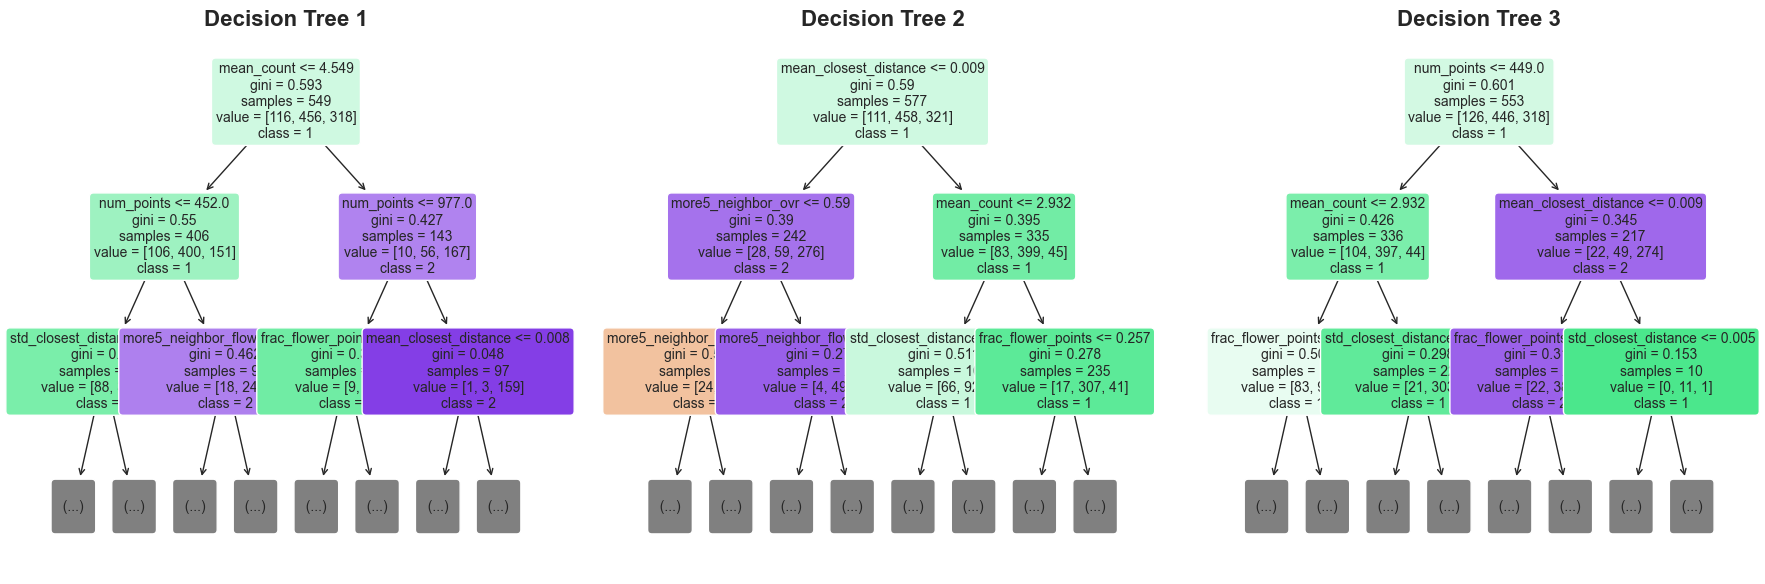

In [20]:
from sklearn.tree import plot_tree

num_trees = 3

fig, axes = plt.subplots(1, num_trees, figsize=(18, 6))

for i in range(num_trees):
    tree = best_rf.estimators_[i]
    class_names = [str(cls) for cls in best_rf.classes_]

    plot_tree(tree, 
              filled=True, 
              feature_names=best_rf.feature_names_in_, 
              class_names=class_names, 
              rounded=True, 
              fontsize=10, 
              ax=axes[i],
              max_depth=2)

    axes[i].set_title(f'Decision Tree {i + 1}', fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()

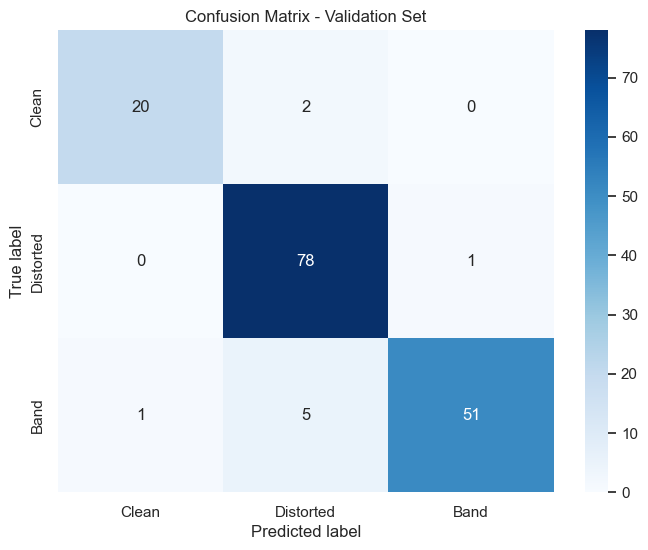

In [18]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

y_pred_rf = best_rf.predict(X_test)
y_pred_train_rf = best_rf.predict(X_train)
cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8, 6))

labels = ['Clean', 'Distorted', 'Band']

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=labels, yticklabels=labels)

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix - Validation Set')
plt.show()

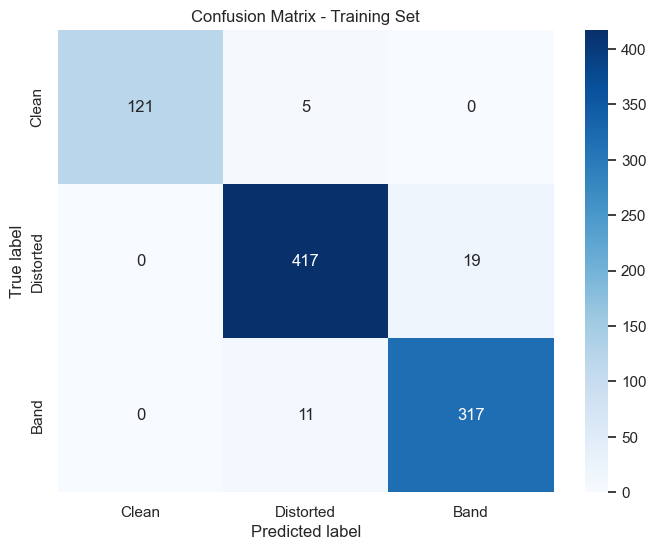

In [19]:
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_train, y_pred_train_rf)

plt.figure(figsize=(8, 6))

labels = ['Clean', 'Distorted', 'Band']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=labels, yticklabels=labels)

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix - Training Set')
plt.show()